In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [78]:
from matplotlib import pyplot as plt

In [79]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [80]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
y_test = data_test[0]
x_test = data_test[1:n]
x_test = x_test / 255

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255
_,m_train = x_train.shape

In [82]:
x_train.shape

(784, 41000)

In [83]:
data.shape

(42000, 785)

In [85]:
def init_param():
    W1 = np.random.randn(10,784)
    b1 = np.random.randn(10,1)
    W2 = np.random.rand(10,10)
    b2 = np.random.randn(10,1)
    return W1,b1,W2,b2

def ReLu(Z):
    return np.maximum(0,Z)
    
def softmax(Z):
    A =  np.exp(Z)/sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1)+ b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2 

def one_hot(Y):
    
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
                         
def deriv_ReLU(Z):
    return Z>0
    

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ2.dot(X.T)
    db1 = 1/m + np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 = alpha * db2
    W2 = W2 - alpha * dW2                     
    b2 = b2 - alpha * db2                  
    return W1,b1,W2,b2                    
                         
                         
                         
                         
                         
                         

In [86]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1, b1, W2, b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2, alpha)
        if(i%10 == 0):
            print("Iterations", i)
            print("Accuracy: ",get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2
    

In [88]:
W1, b1, W2, b2 = gradient_descent(x_train,y_train, 500, 0.1)

Iterations 0
[9 8 6 ... 8 9 6] [9 2 2 ... 3 5 6]
Accuracy:  0.07290243902439024
Iterations 10
[8 3 0 ... 1 0 4] [9 2 2 ... 3 5 6]
Accuracy:  0.24797560975609756
Iterations 20
[0 6 3 ... 7 3 6] [9 2 2 ... 3 5 6]
Accuracy:  0.35373170731707315
Iterations 30
[0 6 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.38753658536585367
Iterations 40
[0 6 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.40387804878048783
Iterations 50
[2 6 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.415390243902439
Iterations 60
[2 6 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.4281219512195122
Iterations 70
[2 6 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.440390243902439
Iterations 80
[2 6 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.45395121951219514
Iterations 90
[2 4 3 ... 7 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.4647804878048781
Iterations 100
[2 4 3 ... 3 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.47678048780487803
Iterations 110
[2 4 3 ... 3 3 3] [9 2 2 ... 3 5 6]
Accuracy:  0.49190243902439024
Iterations 120
[2 4 3 ... 3 3 3] 

In [95]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


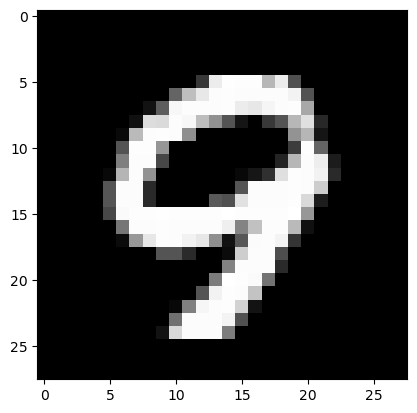

Prediction:  [4]
Label:  2


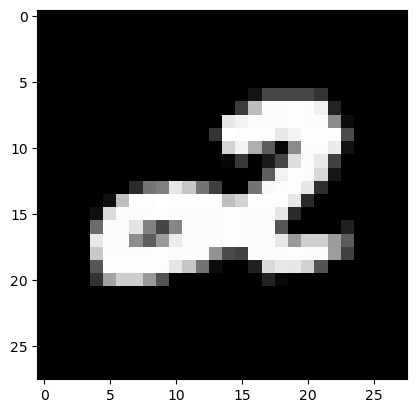

Prediction:  [2]
Label:  2


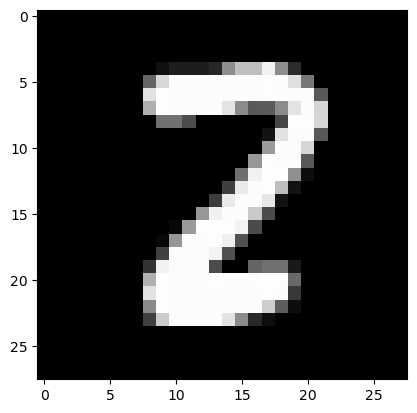

Prediction:  [0]
Label:  0


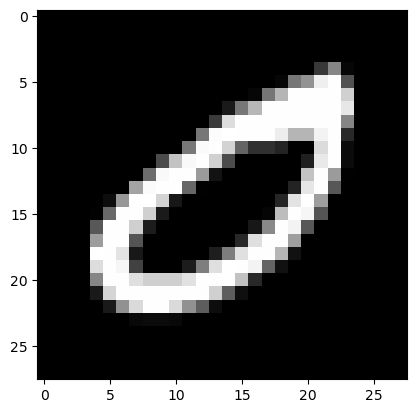

In [96]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [97]:
dev_predictions = make_predictions(x_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_test)

[3 3 6 8 1 1 2 0 9 2 9 4 2 8 0 4 2 4 5 6 0 6 5 3 7 4 6 2 1 3 0 0 5 7 9 2 9
 5 3 3 7 3 6 4 1 1 2 5 6 9 9 1 4 1 5 4 3 5 4 0 6 5 2 1 3 2 3 3 8 0 9 1 1 6
 1 1 8 7 5 0 8 5 1 0 4 5 8 6 9 0 4 6 5 7 6 0 7 8 3 1 1 5 7 5 2 0 4 1 3 6 1
 7 7 6 7 1 8 7 2 0 6 4 6 2 3 8 2 1 6 5 0 8 8 0 6 1 6 4 3 8 8 5 0 2 3 3 9 3
 2 6 9 9 9 7 7 1 7 0 5 2 5 0 7 6 5 2 0 9 4 1 9 7 8 1 1 2 1 5 7 5 1 4 3 9 6
 5 5 4 3 8 3 9 5 3 9 9 6 2 1 2 1 4 1 9 2 5 4 3 9 0 6 5 1 9 7 7 2 4 8 1 5 0
 3 1 1 4 7 6 0 6 6 3 4 0 4 4 1 9 0 4 6 2 5 4 5 3 7 9 9 5 1 2 6 1 3 5 3 6 2
 2 1 2 8 0 8 9 3 4 3 8 6 7 2 9 2 5 2 4 3 8 5 0 7 1 8 9 6 3 9 9 9 2 1 3 7 1
 0 2 5 6 5 2 9 6 9 3 1 2 4 6 7 1 2 9 1 9 1 7 6 2 1 7 6 6 4 0 5 2 0 2 2 0 0
 5 4 6 1 3 9 8 8 3 1 1 5 9 5 0 2 4 9 1 5 0 8 5 8 2 7 2 4 9 9 0 2 9 6 6 2 6
 5 2 7 0 6 6 2 8 5 7 8 4 6 2 5 3 3 4 1 6 1 7 6 9 8 2 0 4 0 2 1 5 4 0 2 0 2
 0 5 1 9 3 8 5 3 2 9 9 0 0 8 1 0 1 3 8 6 9 3 4 8 1 6 3 6 0 0 3 5 0 9 5 3 4
 6 8 4 4 2 1 8 9 1 5 9 8 4 0 4 5 7 8 2 7 7 3 0 6 3 7 3 3 5 8 1 7 2 4 4 8 7
 4 1 5 3 5 7 0 9 7 3 0 2 

0.721